# Starbucks Capstone (predict next purchase time)

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [143]:
sb_class = pd.read_csv('sb_class.csv')

In [144]:
sb_class.head()

,Unnamed: 0,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,...,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,next_purchase_range
0,0,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2,13,3,60.67,0,5,...,23.073007,19,716,65000.0,1,0,0,0,1,0
1,1,04189492f0aa46f2b6fefe34ffbc7062,108.0,66,2,12,3,45.07,0,5,...,16.815577,29,1685,64000.0,0,1,0,0,1,0
2,2,093f0c09cc7242228edbb0e52ca14af6,78.0,72,2,14,3,33.82,0,5,...,28.863072,36,404,35000.0,0,1,0,0,1,1
3,3,0b6c775f84a8435a9083900e1cb43ec9,90.0,72,2,15,3,39.69,0,5,...,21.105699,27,259,35000.0,0,1,0,0,1,1
4,4,1280b4c8aa2a47dbbc1a7c79d0c9484d,102.0,72,2,11,3,49.97,0,5,...,40.024992,48,1526,42000.0,0,1,0,0,1,0


In [145]:
sb_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9130 non-null   int64  
 1   person               9130 non-null   object 
 2   next_purchase        9130 non-null   float64
 3   Recency              9130 non-null   int64  
 4   RecencyCluster       9130 non-null   int64  
 5   Frequency            9130 non-null   int64  
 6   FrequencyCluster     9130 non-null   int64  
 7   Revenue              9130 non-null   float64
 8   RevenueCluster       9130 non-null   int64  
 9   OverallScore         9130 non-null   int64  
 10  TimeDiff             9130 non-null   float64
 11  TimeDiff2            9130 non-null   float64
 12  TimeDiff3            9130 non-null   float64
 13  TimeDiffMean         9130 non-null   float64
 14  TimeDiffStd          9130 non-null   float64
 15  age                  9130 non-null   i

In [146]:
sb_class.drop(columns = ['Unnamed: 0'], inplace = True)

# Histogram
Let's look at a histogram of all the features. It looks like RecencyCluster and RevenueCluster have unbalanced classes. We'll take a closer look at those.

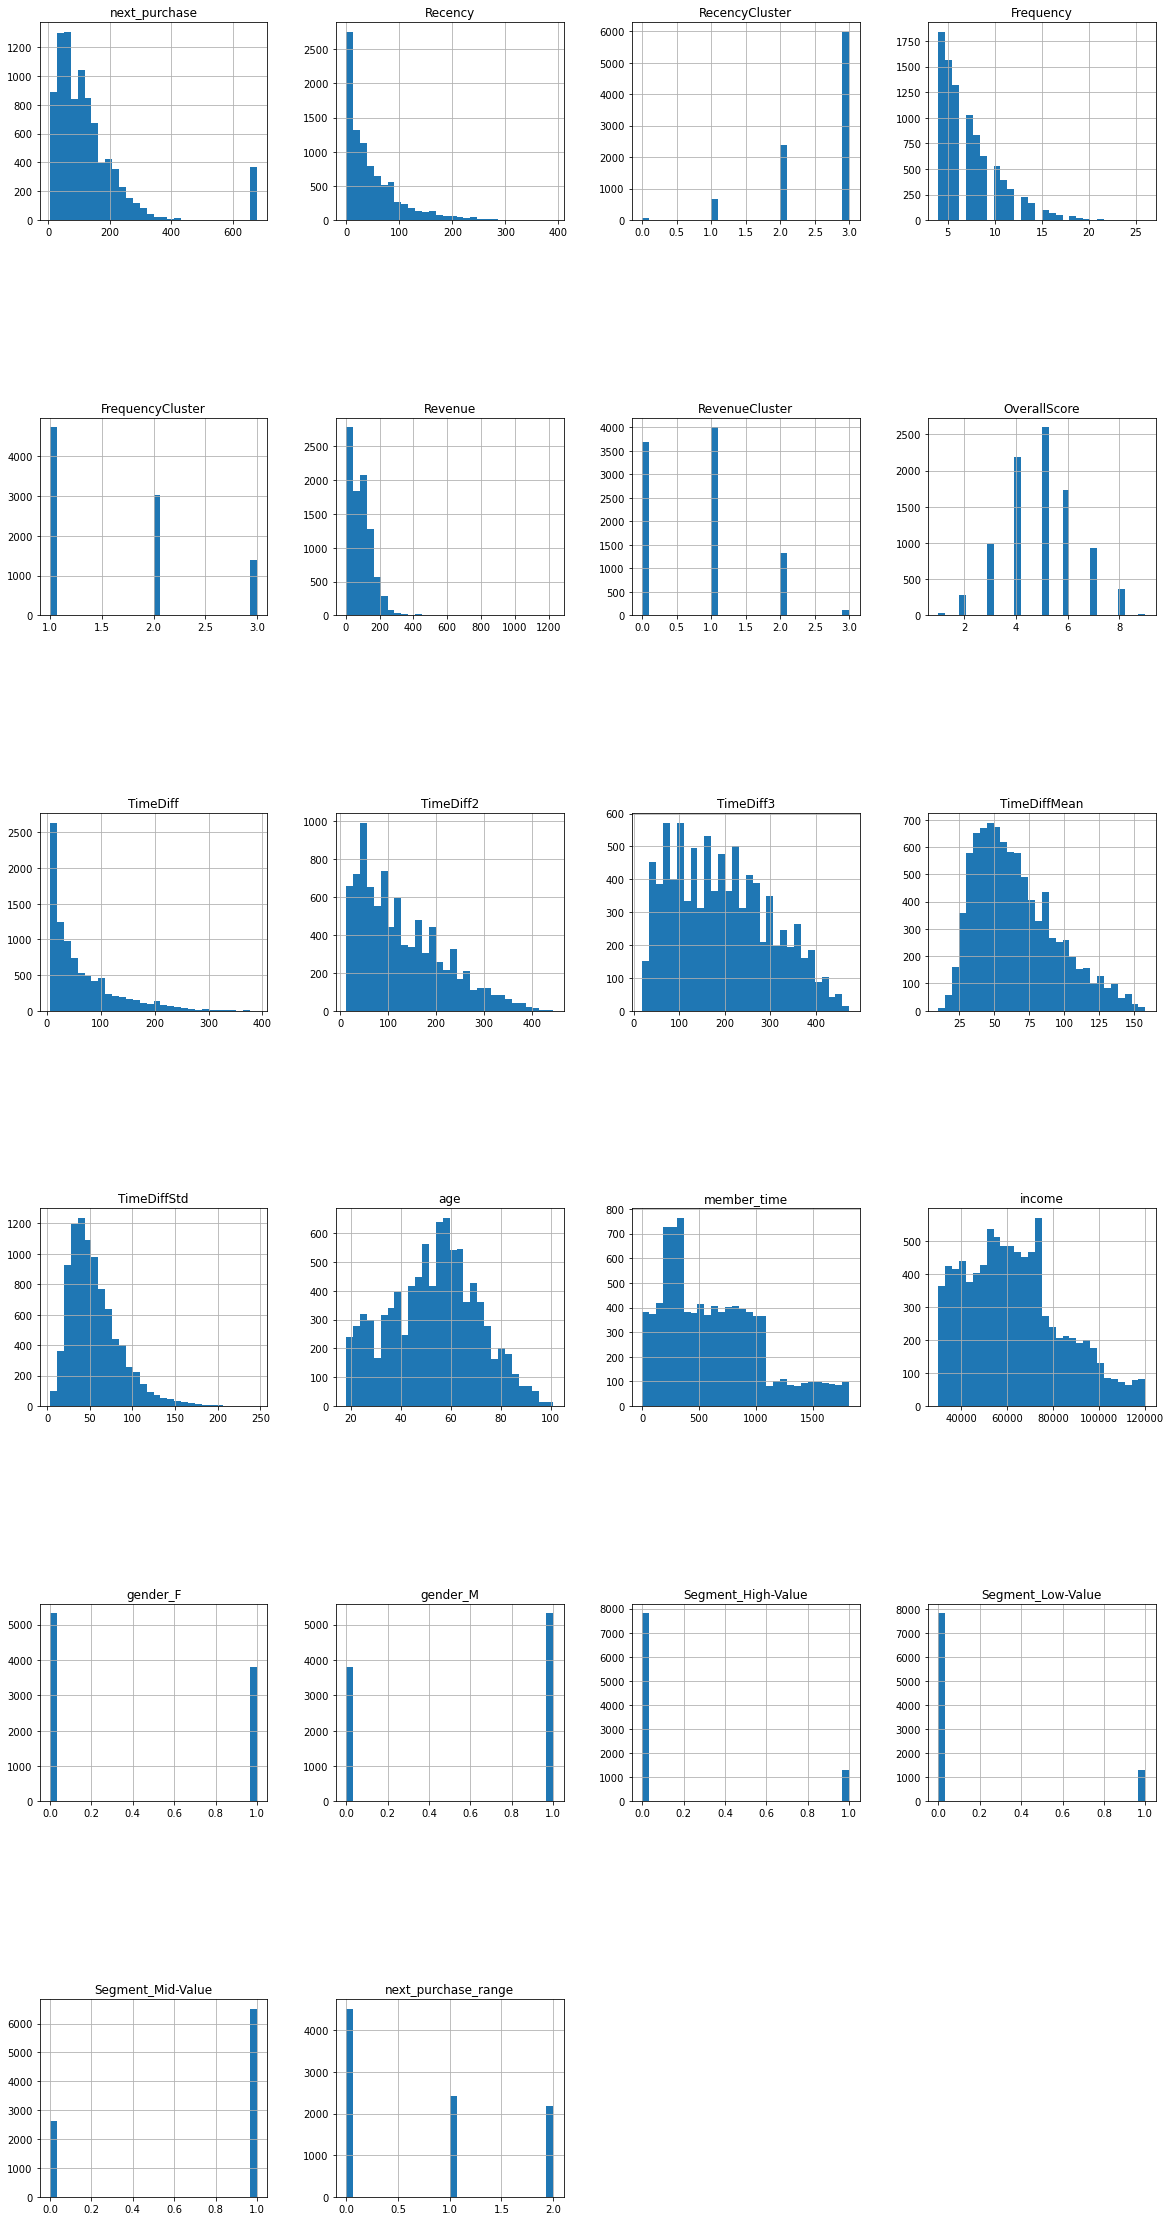

In [147]:
sb_class.hist(layout=(6, 4), figsize=(20,40), bins = 30)
plt.subplots_adjust(hspace=1)
plt.show()

These next few cells will show that customer recency is one thing we have going for us while those high-revenue customers really are in an elite class.

In [148]:
sb_class['RecencyCluster'].value_counts()

3    5982
2    2388
1     680
0      80
Name: RecencyCluster, dtype: int64

In [149]:
zero_recency = sb_class[sb_class['RecencyCluster'] == 0]

In [150]:
zero_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1322 to 8533
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   person               80 non-null     object 
 1   next_purchase        80 non-null     float64
 2   Recency              80 non-null     int64  
 3   RecencyCluster       80 non-null     int64  
 4   Frequency            80 non-null     int64  
 5   FrequencyCluster     80 non-null     int64  
 6   Revenue              80 non-null     float64
 7   RevenueCluster       80 non-null     int64  
 8   OverallScore         80 non-null     int64  
 9   TimeDiff             80 non-null     float64
 10  TimeDiff2            80 non-null     float64
 11  TimeDiff3            80 non-null     float64
 12  TimeDiffMean         80 non-null     float64
 13  TimeDiffStd          80 non-null     float64
 14  age                  80 non-null     int64  
 15  member_time          80 non-null     

In [151]:
zero_recency.describe()

,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,TimeDiff2,...,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,next_purchase_range
count,80.000000,80.000000,80.0,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.0
mean,335.862500,275.475000,0.0,4.787500,1.112500,73.37700,0.637500,1.750000,44.925000,80.775000,...,32.692156,56.087500,521.775000,68312.500000,0.512500,0.487500,0.0,0.962500,0.037500,0.0
std,65.688514,31.216263,0.0,1.299403,0.317974,50.78719,0.641275,0.754732,38.150858,44.777361,...,17.800505,17.019121,370.115274,22946.604917,0.502997,0.502997,0.0,0.191182,0.191182,0.0
min,252.000000,246.000000,0.0,4.000000,1.000000,7.03000,0.000000,1.000000,6.000000,18.000000,...,6.000000,18.000000,30.000000,31000.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,294.000000,252.000000,0.0,4.000000,1.000000,19.99000,0.000000,1.000000,12.000000,48.000000,...,18.513207,45.750000,185.000000,49750.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
50%,324.000000,264.000000,0.0,4.000000,1.000000,71.67000,1.000000,2.000000,30.000000,72.000000,...,28.782241,57.000000,363.500000,69500.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0
75%,361.500000,288.000000,0.0,5.000000,1.000000,104.45750,1.000000,2.000000,72.000000,108.000000,...,42.035654,68.000000,769.250000,85500.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0
max,679.000000,390.000000,0.0,10.000000,2.000000,198.91000,2.000000,4.000000,156.000000,204.000000,...,80.572948,94.000000,1573.000000,119000.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [152]:
best_recency = sb_class[sb_class['RecencyCluster'] == 3]

In [153]:
best_recency.describe()

,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,TimeDiff2,...,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,next_purchase_range
count,5982.000000,5982.000000,5982.0,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,...,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.0,5982.000000,5982.000000
mean,101.867603,19.224674,3.0,7.757606,1.748579,101.218572,0.794885,5.543464,59.829488,123.200602,...,56.876824,52.907222,650.588599,62099.799398,0.417419,0.582581,0.206787,0.0,0.793213,1.053327
std,128.170654,14.959121,0.0,3.315352,0.755945,103.322613,0.757874,1.149151,61.490523,90.728097,...,30.054278,17.855106,430.701387,20492.773284,0.493174,0.493174,0.405035,0.0,0.405035,0.821667
min,6.000000,0.000000,3.0,4.000000,1.000000,2.270000,0.000000,4.000000,6.000000,12.000000,...,3.464102,18.000000,0.000000,30000.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,36.000000,6.000000,3.0,5.000000,1.000000,35.410000,0.000000,5.000000,18.000000,48.000000,...,35.156792,40.000000,295.250000,46000.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,66.000000,18.000000,3.0,7.000000,2.000000,85.905000,1.000000,5.000000,36.000000,96.000000,...,51.029403,54.000000,588.000000,60000.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
75%,114.000000,30.000000,3.0,10.000000,2.000000,133.395000,1.000000,6.000000,78.000000,180.000000,...,71.655423,66.000000,926.000000,74000.000000,1.000000,1.000000,0.000000,0.0,1.000000,2.000000
max,679.000000,48.000000,3.0,26.000000,3.000000,1226.790000,3.000000,9.000000,390.000000,444.000000,...,246.024389,101.000000,1823.000000,120000.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.000000


In [154]:
sb_class['RevenueCluster'].value_counts()

1    4007
0    3684
2    1322
3     117
Name: RevenueCluster, dtype: int64

In [155]:
high_revenue = sb_class[sb_class['RevenueCluster'] == 3]

In [156]:
high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 3684 to 3800
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   person               117 non-null    object 
 1   next_purchase        117 non-null    float64
 2   Recency              117 non-null    int64  
 3   RecencyCluster       117 non-null    int64  
 4   Frequency            117 non-null    int64  
 5   FrequencyCluster     117 non-null    int64  
 6   Revenue              117 non-null    float64
 7   RevenueCluster       117 non-null    int64  
 8   OverallScore         117 non-null    int64  
 9   TimeDiff             117 non-null    float64
 10  TimeDiff2            117 non-null    float64
 11  TimeDiff3            117 non-null    float64
 12  TimeDiffMean         117 non-null    float64
 13  TimeDiffStd          117 non-null    float64
 14  age                  117 non-null    int64  
 15  member_time          117 non-null   

In [157]:
high_revenue.describe()

,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,TimeDiff2,...,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,next_purchase_range
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000
mean,120.136752,40.256410,2.666667,8.410256,1.888889,747.882137,3.0,7.555556,58.051282,117.128205,...,52.535472,55.888889,594.111111,77393.162393,0.478632,0.521368,0.846154,0.0,0.153846,0.811966
std,124.894225,39.321433,0.557086,3.311823,0.763135,177.468282,0.0,1.003824,57.435698,86.373840,...,31.948544,16.345820,326.396965,19437.325125,0.501692,0.501692,0.362353,0.0,0.362353,0.829745
min,6.000000,0.000000,1.000000,4.000000,1.000000,479.870000,3.0,5.000000,6.000000,12.000000,...,8.485281,18.000000,37.000000,39000.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,48.000000,12.000000,2.000000,6.000000,1.000000,605.350000,3.0,7.000000,18.000000,48.000000,...,31.473694,46.000000,320.000000,64000.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
50%,90.000000,30.000000,3.000000,8.000000,2.000000,716.180000,3.0,8.000000,42.000000,84.000000,...,44.484931,57.000000,539.000000,72000.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000
75%,156.000000,60.000000,3.000000,10.000000,2.000000,894.710000,3.0,8.000000,78.000000,174.000000,...,64.475909,67.000000,821.000000,94000.000000,1.000000,1.000000,1.000000,0.0,0.000000,2.000000
max,679.000000,210.000000,3.000000,20.000000,3.000000,1226.790000,3.0,9.000000,258.000000,444.000000,...,212.075458,94.000000,1752.000000,119000.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.000000


# Modeling

In [158]:
from sklearn.model_selection import train_test_split 

In [159]:
X = sb_class.drop(columns = ['person', 'next_purchase_range'])
y = sb_class['next_purchase_range']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [162]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
X_scaled_df = pd.DataFrame(X_train, columns = X.columns)

In [164]:
X_scaled_df.head(10)

,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,TimeDiff2,...,TimeDiffMean,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,0.182495,-0.936509,0.655437,4.330337,1.868422,-0.135200,0.309990,1.434385,-0.919887,-1.311438,...,-1.504283,-1.143378,-0.448961,0.552230,0.486453,-0.844089,0.844089,2.423230,-0.405375,-1.57751
1,-0.768873,-0.476142,0.655437,-0.079398,0.500913,-0.414501,-1.040484,0.024270,-0.144920,0.205595,...,-0.149505,-0.637902,0.397626,0.042158,-1.475825,-0.844089,0.844089,-0.412672,-0.405375,0.63391
2,0.227798,-0.245959,0.655437,-0.709360,-0.866595,-0.364203,-1.040484,-0.680787,2.567464,1.446803,...,1.375053,0.979725,0.454066,-0.952132,-0.901500,-0.844089,0.844089,-0.412672,-0.405375,0.63391
3,-0.089325,0.789866,-0.838997,0.865545,0.500913,0.035220,0.309990,0.024270,0.630047,-0.139185,...,-0.900234,-0.402499,-1.803501,1.584129,-0.805779,-0.844089,0.844089,-0.412672,-0.405375,0.63391
4,-0.723569,-0.476142,0.655437,0.550564,0.500913,-0.710764,-1.040484,0.024270,-0.532403,-0.897701,...,-0.392048,0.606833,0.736261,0.241956,-0.757919,-0.844089,0.844089,-0.412672,-0.405375,0.63391
5,-0.361144,-0.361050,0.655437,-0.394379,-0.866595,-0.414599,-1.040484,-0.680787,-0.726145,-1.173526,...,0.605844,1.748280,-1.577745,0.636851,-0.710058,-0.844089,0.844089,-0.412672,-0.405375,0.63391
6,-0.134628,1.020050,-0.838997,-0.394379,-0.866595,-0.770431,-1.040484,-1.385844,-0.048049,-0.346053,...,-0.142575,-0.669472,0.115431,0.881309,-0.470756,1.184709,-1.184709,-0.412672,2.466853,-1.57751
7,-0.134628,-0.591234,0.655437,-0.709360,-0.866595,-0.448526,-1.040484,-0.680787,2.276851,1.377847,...,1.427027,0.806297,-1.859941,-0.785242,-0.805779,1.184709,-1.184709,-0.412672,-0.405375,0.63391
8,-0.587660,-0.130867,0.655437,-0.079398,0.500913,-0.183427,0.309990,0.729328,-0.823016,-1.173526,...,-0.010909,0.683536,0.454066,0.481713,-1.045082,-0.844089,0.844089,-0.412672,-0.405375,0.63391
9,-0.451750,-0.015775,0.655437,-0.709360,-0.866595,-0.206308,0.309990,0.024270,1.501885,0.688287,...,-0.288101,0.380337,-1.972819,0.629799,-0.662198,-0.844089,0.844089,-0.412672,-0.405375,0.63391


In [165]:
X_scaled_df.mean()

next_purchase         4.287327e-17
Recency              -4.795448e-17
RecencyCluster        3.050812e-16
Frequency            -2.541474e-16
FrequencyCluster     -3.055676e-17
Revenue              -1.012768e-16
RevenueCluster        4.176235e-16
OverallScore         -3.381568e-16
TimeDiff             -2.051463e-16
TimeDiff2             1.136194e-16
TimeDiff3             8.242854e-17
TimeDiffMean         -5.760444e-17
TimeDiffStd          -1.811170e-16
age                  -2.153739e-16
member_time          -2.536263e-17
income                1.643881e-16
gender_F              9.592633e-17
gender_M             -9.592633e-17
Segment_High-Value    2.653174e-16
Segment_Low-Value     3.935116e-16
Segment_Mid-Value    -5.317293e-16
dtype: float64

In [166]:
X_scaled_df.std()

next_purchase         1.000078
Recency               1.000078
RecencyCluster        1.000078
Frequency             1.000078
FrequencyCluster      1.000078
Revenue               1.000078
RevenueCluster        1.000078
OverallScore          1.000078
TimeDiff              1.000078
TimeDiff2             1.000078
TimeDiff3             1.000078
TimeDiffMean          1.000078
TimeDiffStd           1.000078
age                   1.000078
member_time           1.000078
income                1.000078
gender_F              1.000078
gender_M              1.000078
Segment_High-Value    1.000078
Segment_Low-Value     1.000078
Segment_Mid-Value     1.000078
dtype: float64

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [168]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Accuracy score:")
print(accuracy_score(y_test, y_pred))

Confusion matrix:
[[1353    3    0]
 [   0  734    5]
 [   0    5  639]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       0.99      0.99      0.99       739
           2       0.99      0.99      0.99       644

    accuracy                           1.00      2739
   macro avg       0.99      0.99      0.99      2739
weighted avg       1.00      1.00      1.00      2739

Accuracy score:
0.995253742241694


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
y_test.value_counts()

0    1356
1     739
2     644
Name: next_purchase_range, dtype: int64

# Wait a minute ...
We're getting 99.5 percent accuracy from an out-of-the-box, untuned Logistic Regression model, and all three classes are fairly well represented. It's not like this is a case of deceptively high accuracy with unbalanced classes. Maybe we should break our target variable into more than three classes.

In [170]:
sb_class.head()

,person,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,...,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,next_purchase_range
0,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0,126,2,13,3,60.67,0,5,12.0,...,23.073007,19,716,65000.0,1,0,0,0,1,0
1,04189492f0aa46f2b6fefe34ffbc7062,108.0,66,2,12,3,45.07,0,5,24.0,...,16.815577,29,1685,64000.0,0,1,0,0,1,0
2,093f0c09cc7242228edbb0e52ca14af6,78.0,72,2,14,3,33.82,0,5,12.0,...,28.863072,36,404,35000.0,0,1,0,0,1,1
3,0b6c775f84a8435a9083900e1cb43ec9,90.0,72,2,15,3,39.69,0,5,18.0,...,21.105699,27,259,35000.0,0,1,0,0,1,1
4,1280b4c8aa2a47dbbc1a7c79d0c9484d,102.0,72,2,11,3,49.97,0,5,24.0,...,40.024992,48,1526,42000.0,0,1,0,0,1,0


(array([3.493e+03, 2.729e+03, 1.497e+03, 7.270e+02, 2.500e+02, 5.100e+01,
        1.500e+01, 2.000e+00, 0.000e+00, 3.660e+02]),
 array([  6. ,  73.3, 140.6, 207.9, 275.2, 342.5, 409.8, 477.1, 544.4,
        611.7, 679. ]),
 <BarContainer object of 10 artists>)

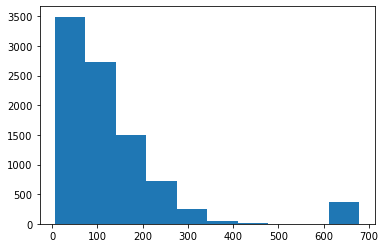

In [171]:
plt.hist(sb_class['next_purchase'])

# Checking percentiles
Let's see what the percentiles are for each 24-hour increment. They're spaced out somewhat evenly through 120 hours.

In [172]:
from scipy import stats

In [173]:
for i in range(24, 678, 24):
    print(f"percentile of {i} hours: {stats.percentileofscore(sb_class['next_purchase'], i)}")

percentile of 24 hours: 8.05038335158817
percentile of 48 hours: 22.075575027382257
percentile of 72 hours: 36.51150054764513
percentile of 96 hours: 48.986856516977
percentile of 120 hours: 60.17524644030668
percentile of 144 hours: 69.15115005476451
percentile of 168 hours: 76.36911281489594
percentile of 192 hours: 81.85104052573932
percentile of 216 hours: 86.22124863088719
percentile of 240 hours: 89.43592552026287
percentile of 264 hours: 91.87294633077765
percentile of 288 hours: 93.29134720700986
percentile of 312 hours: 94.40854326396494
percentile of 336 hours: 95.13691128148959
percentile of 360 hours: 95.44359255202629
percentile of 384 hours: 95.70646221248631
percentile of 408 hours: 95.80503833515881
percentile of 432 hours: 95.92552026286965
percentile of 456 hours: 95.947426067908
percentile of 480 hours: 95.96933187294633
percentile of 504 hours: 95.98028477546549
percentile of 528 hours: 95.99123767798467
percentile of 552 hours: 95.99123767798467
percentile of 576 h

# Let's try eight classes
This way we essentially can predict next purchase day for customers who are expected to come back within the next five days. Those will be our first five classes. Then the next class will be customers expected to make their next purchase within 5-7 days. Then 7-10 days. Then more than 10 days. This fine-tunes the segmentation.

In [174]:
sb_class['next_purchase_range'] = 8 #within 1 day
sb_class.loc[sb_class.next_purchase>24,'next_purchase_range'] = 7 #within 2 days
sb_class.loc[sb_class.next_purchase>48,'next_purchase_range'] = 6 #within 3 days
sb_class.loc[sb_class.next_purchase>72,'next_purchase_range'] = 5 #within 4 days
sb_class.loc[sb_class.next_purchase>96,'next_purchase_range'] = 4 #within 5 days
sb_class.loc[sb_class.next_purchase>120,'next_purchase_range'] = 3 #within 6 or 7 days
sb_class.loc[sb_class.next_purchase>168,'next_purchase_range'] = 2 #within 8, 9 or 10 days
sb_class.loc[sb_class.next_purchase>240,'next_purchase_range'] = 1 #More than 10 days

And it looks like there's no extreme imbalance among the classes.

In [175]:
sb_class['next_purchase_range'].value_counts()

3    1436
6    1306
7    1298
2    1139
5    1115
4    1002
1     945
8     889
Name: next_purchase_range, dtype: int64

In [176]:
Xlr = sb_class.drop(columns = ['person', 'next_purchase_range'])
ylr = sb_class['next_purchase_range']

In [177]:
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr, ylr, test_size = 0.3, random_state = 42)

In [178]:
Xlr_train = scaler.fit_transform(Xlr_train)
Xlr_test = scaler.transform(Xlr_test)

In [179]:
Xlr_scaled_df = pd.DataFrame(Xlr_train, columns = Xlr.columns)

In [180]:
Xlr_scaled_df.head(10)

,next_purchase,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,TimeDiff,TimeDiff2,...,TimeDiffMean,TimeDiffStd,age,member_time,income,gender_F,gender_M,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,0.182495,-0.936509,0.655437,4.330337,1.868422,-0.135200,0.309990,1.434385,-0.919887,-1.311438,...,-1.504283,-1.143378,-0.448961,0.552230,0.486453,-0.844089,0.844089,2.423230,-0.405375,-1.57751
1,-0.768873,-0.476142,0.655437,-0.079398,0.500913,-0.414501,-1.040484,0.024270,-0.144920,0.205595,...,-0.149505,-0.637902,0.397626,0.042158,-1.475825,-0.844089,0.844089,-0.412672,-0.405375,0.63391
2,0.227798,-0.245959,0.655437,-0.709360,-0.866595,-0.364203,-1.040484,-0.680787,2.567464,1.446803,...,1.375053,0.979725,0.454066,-0.952132,-0.901500,-0.844089,0.844089,-0.412672,-0.405375,0.63391
3,-0.089325,0.789866,-0.838997,0.865545,0.500913,0.035220,0.309990,0.024270,0.630047,-0.139185,...,-0.900234,-0.402499,-1.803501,1.584129,-0.805779,-0.844089,0.844089,-0.412672,-0.405375,0.63391
4,-0.723569,-0.476142,0.655437,0.550564,0.500913,-0.710764,-1.040484,0.024270,-0.532403,-0.897701,...,-0.392048,0.606833,0.736261,0.241956,-0.757919,-0.844089,0.844089,-0.412672,-0.405375,0.63391
5,-0.361144,-0.361050,0.655437,-0.394379,-0.866595,-0.414599,-1.040484,-0.680787,-0.726145,-1.173526,...,0.605844,1.748280,-1.577745,0.636851,-0.710058,-0.844089,0.844089,-0.412672,-0.405375,0.63391
6,-0.134628,1.020050,-0.838997,-0.394379,-0.866595,-0.770431,-1.040484,-1.385844,-0.048049,-0.346053,...,-0.142575,-0.669472,0.115431,0.881309,-0.470756,1.184709,-1.184709,-0.412672,2.466853,-1.57751
7,-0.134628,-0.591234,0.655437,-0.709360,-0.866595,-0.448526,-1.040484,-0.680787,2.276851,1.377847,...,1.427027,0.806297,-1.859941,-0.785242,-0.805779,1.184709,-1.184709,-0.412672,-0.405375,0.63391
8,-0.587660,-0.130867,0.655437,-0.079398,0.500913,-0.183427,0.309990,0.729328,-0.823016,-1.173526,...,-0.010909,0.683536,0.454066,0.481713,-1.045082,-0.844089,0.844089,-0.412672,-0.405375,0.63391
9,-0.451750,-0.015775,0.655437,-0.709360,-0.866595,-0.206308,0.309990,0.024270,1.501885,0.688287,...,-0.288101,0.380337,-1.972819,0.629799,-0.662198,-0.844089,0.844089,-0.412672,-0.405375,0.63391


In [181]:
Xlr_scaled_df.mean()

next_purchase         4.287327e-17
Recency              -4.795448e-17
RecencyCluster        3.050812e-16
Frequency            -2.541474e-16
FrequencyCluster     -3.055676e-17
Revenue              -1.012768e-16
RevenueCluster        4.176235e-16
OverallScore         -3.381568e-16
TimeDiff             -2.051463e-16
TimeDiff2             1.136194e-16
TimeDiff3             8.242854e-17
TimeDiffMean         -5.760444e-17
TimeDiffStd          -1.811170e-16
age                  -2.153739e-16
member_time          -2.536263e-17
income                1.643881e-16
gender_F              9.592633e-17
gender_M             -9.592633e-17
Segment_High-Value    2.653174e-16
Segment_Low-Value     3.935116e-16
Segment_Mid-Value    -5.317293e-16
dtype: float64

In [182]:
Xlr_scaled_df.std()

next_purchase         1.000078
Recency               1.000078
RecencyCluster        1.000078
Frequency             1.000078
FrequencyCluster      1.000078
Revenue               1.000078
RevenueCluster        1.000078
OverallScore          1.000078
TimeDiff              1.000078
TimeDiff2             1.000078
TimeDiff3             1.000078
TimeDiffMean          1.000078
TimeDiffStd           1.000078
age                   1.000078
member_time           1.000078
income                1.000078
gender_F              1.000078
gender_M              1.000078
Segment_High-Value    1.000078
Segment_Low-Value     1.000078
Segment_Mid-Value     1.000078
dtype: float64

In [183]:
clfr = LogisticRegression()
clfr.fit(Xlr_train, ylr_train)
ylr_pred = clfr.predict(Xlr_test)
print("Confusion matrix:")
print(confusion_matrix(ylr_test, ylr_pred))
print()
print("Classification report:")
print(classification_report(ylr_test, ylr_pred))
print("Accuracy score:")
print(accuracy_score(ylr_test, ylr_pred))

Confusion matrix:
[[286  13   0   0   0   0   0   0]
 [  3 322  19   0   0   0   0   0]
 [  0   4 410   1   0   0   0   0]
 [  0   0  44 221  33   0   0   0]
 [  0   0   0  20 259  66   0   0]
 [  0   0   0   0  17 336  41   0]
 [  0   0   0   0   0   9 333  30]
 [  0   0   0   0   0   0  46 226]]

Classification report:
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       299
           2       0.95      0.94      0.94       344
           3       0.87      0.99      0.92       415
           4       0.91      0.74      0.82       298
           5       0.84      0.75      0.79       345
           6       0.82      0.85      0.83       394
           7       0.79      0.90      0.84       372
           8       0.88      0.83      0.86       272

    accuracy                           0.87      2739
   macro avg       0.88      0.87      0.87      2739
weighted avg       0.88      0.87      0.87      2739

Accuracy score:
0.87367652

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Baseline model
Our baseline accuracy score is 87.4 percent. Now we'll regularize the C parameter.

In [186]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [187]:
param_grid = {"C": [0.001, 0.1, 1, 10, 100]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(Xlr_train, ylr_train) 
logreg_cv.best_params_

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 100}

In [188]:
logreg_cv.best_score_

0.9921761303639751

In [189]:
best_clsfr = LogisticRegression(C=100)
best_clsfr.fit(Xlr_train, ylr_train)
ylr_pred = best_clsfr.predict(Xlr_test)
print("Confusion matrix:")
print(confusion_matrix(ylr_test, ylr_pred))
print()
print("Classification report:")
print(classification_report(ylr_test, ylr_pred))
print("Accuracy score:")
print(accuracy_score(ylr_test, ylr_pred))

Confusion matrix:
[[295   4   0   0   0   0   0   0]
 [  3 336   5   0   0   0   0   0]
 [  0   1 414   0   0   0   0   0]
 [  0   0   0 298   0   0   0   0]
 [  0   0   0   1 344   0   0   0]
 [  0   0   0   0   0 394   0   0]
 [  0   0   0   0   0   0 372   0]
 [  0   0   0   0   0   0   0 272]]

Classification report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       299
           2       0.99      0.98      0.98       344
           3       0.99      1.00      0.99       415
           4       1.00      1.00      1.00       298
           5       1.00      1.00      1.00       345
           6       1.00      1.00      1.00       394
           7       1.00      1.00      1.00       372
           8       1.00      1.00      1.00       272

    accuracy                           0.99      2739
   macro avg       0.99      0.99      0.99      2739
weighted avg       0.99      0.99      0.99      2739

Accuracy score:
0.99488864

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Next steps
So we're back to 99.5 percent accuracy even with eight classes. We can strive for 100 percent accuracy with more sophisticated models, or dare we think about turning this into a regression model that tries to predict the hour of the customer's next purchase?